<a href="https://colab.research.google.com/github/gregoriullmann/Trabalho_ANN_01_opcao02/blob/main/Trabalho_ANN_01_Greg_op2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [232]:
# bibliotecas usadas
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score 


In [233]:
# para gerar o grafico no browser
%matplotlib inline

In [234]:
# local dos dados e modifica o diretorio
# path='/content/dados.csv'
# os.chdir(path)

In [235]:
from google.colab import drive
drive.mount("/content/drive")
%cd /content/drive/My Drive/ANN/Trabalho_01/opcao_02
%ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/ANN/Trabalho_01/opcao_02
dados.CSV  Trabalho_ANN_01_Greg_op2.ipynb


In [236]:
# leitura dos dados
DAT=pd.read_csv("dados.CSV", sep=';')
print(DAT)


      Gly    Cat    Pt  pH  Yhidro
0    0.50  2.525  2.51   2     144
1    0.50  2.525  0.02   7     124
2    0.50  0.050  2.51   7      28
3    0.50  5.000  2.51   7     211
4    0.50  2.525  5.00   7     182
5    0.50  2.525  2.51  12      57
6   25.25  2.525  0.02   2     103
7   25.25  0.050  2.51   2      25
8   25.25  5.000  2.51   2     269
9   25.25  2.525  5.00   2     230
10  25.25  0.050  0.02   7      28
11  25.25  5.000  0.02   7     145
12  25.25  2.525  2.51   7     255
13  25.25  2.525  2.51   7     247
14  25.25  2.525  2.51   7     253
15  25.25  2.525  2.51   7     237
16  25.25  2.525  2.51   7     243
17  25.25  0.050  5.00   7      56
18  25.25  5.000  5.00   7     243
19  25.25  2.525  0.02  12      75
20  25.25  0.050  2.51  12      14
21  25.25  5.000  2.51  12     132
22  25.25  2.525  5.00   1     122
23  50.00  2.525  2.51   2     255
24  50.00  2.525  0.02   7     121
25  50.00  0.050  2.51   7      44
26  50.00  5.000  2.51   7     263
27  50.00  2.525  5.

In [237]:
# separa as colunas de interesse, nao eh tao necessario aqui pois uso a tabela toda, poderia ter usado o DAT sem problemas
Index=[0,1,2,3,4]
Dat_Select=[]
Dat_Select=DAT.iloc[:,Index].copy()
#print(Dat_Select)

In [238]:
# funcao normatiza dados (no meu caso sera a codificacao em -1, 0, 1)
def Normatiza(x):
    strings=list(x)
    for i in strings:
        max_x=x[i].max()
        min_x=x[i].min()
        a=min_x
        b=max_x
        x[i]=(x[i]-a)/(b-a)
    return x

In [239]:
# funcao retorna os dados a forma original
def Original(x,x_old):
    strings=list(x)
    for i in strings:
        max_x=x_old[i].max()
        min_x=x_old[i].min()
        a=min_x
        b=max_x
        x[i]=x[i]*(b-a)+a
    return x

In [240]:
# separa os dados em normatizados e originais
DAT_OLD=[]
DAT_OLD=Dat_Select.copy()
DAT=Normatiza(Dat_Select)

In [241]:
# separa os dados em treino e teste
train=DAT.sample(frac=0.8,random_state=None) # poderia ser frac=0.5? sim ou nao?
test=DAT.drop(train.index)
print(DAT)

    Gly  Cat   Pt        pH    Yhidro
0   0.0  0.5  0.5  0.090909  0.503876
1   0.0  0.5  0.0  0.545455  0.426357
2   0.0  0.0  0.5  0.545455  0.054264
3   0.0  1.0  0.5  0.545455  0.763566
4   0.0  0.5  1.0  0.545455  0.651163
5   0.0  0.5  0.5  1.000000  0.166667
6   0.5  0.5  0.0  0.090909  0.344961
7   0.5  0.0  0.5  0.090909  0.042636
8   0.5  1.0  0.5  0.090909  0.988372
9   0.5  0.5  1.0  0.090909  0.837209
10  0.5  0.0  0.0  0.545455  0.054264
11  0.5  1.0  0.0  0.545455  0.507752
12  0.5  0.5  0.5  0.545455  0.934109
13  0.5  0.5  0.5  0.545455  0.903101
14  0.5  0.5  0.5  0.545455  0.926357
15  0.5  0.5  0.5  0.545455  0.864341
16  0.5  0.5  0.5  0.545455  0.887597
17  0.5  0.0  1.0  0.545455  0.162791
18  0.5  1.0  1.0  0.545455  0.887597
19  0.5  0.5  0.0  1.000000  0.236434
20  0.5  0.0  0.5  1.000000  0.000000
21  0.5  1.0  0.5  1.000000  0.457364
22  0.5  0.5  1.0  0.000000  0.418605
23  1.0  0.5  0.5  0.090909  0.934109
24  1.0  0.5  0.0  0.545455  0.414729
25  1.0  0.0

In [242]:
# obtem as variaveis independentes (treino e teste)
x_train=train.iloc[:,[0,1,2,3]]
x_test=test.iloc[:,[0,1,2,3]]
X_OLD=DAT_OLD.iloc[:,[0,1,2,3]]
print(x_train)

    Gly  Cat   Pt        pH
8   0.5  1.0  0.5  0.090909
16  0.5  0.5  0.5  0.545455
1   0.0  0.5  0.0  0.545455
13  0.5  0.5  0.5  0.545455
27  1.0  0.5  1.0  0.545455
11  0.5  1.0  0.0  0.545455
10  0.5  0.0  0.0  0.545455
17  0.5  0.0  1.0  0.545455
6   0.5  0.5  0.0  0.090909
12  0.5  0.5  0.5  0.545455
15  0.5  0.5  0.5  0.545455
22  0.5  0.5  1.0  0.000000
19  0.5  0.5  0.0  1.000000
7   0.5  0.0  0.5  0.090909
28  1.0  0.5  0.5  1.000000
25  1.0  0.0  0.5  0.545455
0   0.0  0.5  0.5  0.090909
5   0.0  0.5  0.5  1.000000
4   0.0  0.5  1.0  0.545455
26  1.0  1.0  0.5  0.545455
9   0.5  0.5  1.0  0.090909
2   0.0  0.0  0.5  0.545455
14  0.5  0.5  0.5  0.545455


In [243]:
# obtem as variaveis dependentes (treino e teste)
y_train=train.iloc[:,[4]]
y_test=test.iloc[:,[4]]
Y_OLD=DAT_OLD.iloc[:,[4]]
print(y_train)

      Yhidro
8   0.988372
16  0.887597
1   0.426357
13  0.903101
27  1.000000
11  0.507752
10  0.054264
17  0.162791
6   0.344961
12  0.934109
15  0.864341
22  0.418605
19  0.236434
7   0.042636
28  0.352713
25  0.116279
0   0.503876
5   0.166667
4   0.651163
26  0.965116
9   0.837209
2   0.054264
14  0.926357


In [244]:
# define a rede neural 
clf = MLPRegressor(solver='lbfgs',activation='logistic',alpha=0.000001,hidden_layer_sizes=(4,), max_iter = 1000000, warm_start = True, early_stopping = True, validation_fraction = 0.05, max_fun = 1000000)
#no artigo usado como base foi utilizada uma funcao de ativacao hyperbolic tangent sigmoid function e duas funcoes lineares para os outputs

In [245]:
# treina a rede neural
clf.fit(x_train, y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor(activation='logistic', alpha=1e-06, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=True, epsilon=1e-08,
             hidden_layer_sizes=(4,), learning_rate='constant',
             learning_rate_init=0.001, max_fun=1000000, max_iter=1000000,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='lbfgs',
             tol=0.0001, validation_fraction=0.05, verbose=False,
             warm_start=True)

In [246]:
# usa a rede neural treina em calculos para treino e teste
y_calc_train=clf.predict(x_train)
y_calc_test=clf.predict(x_test)

In [247]:
# transforma a saida da rede em dataframe 
y_calc_train=pd.DataFrame(y_calc_train)
y_calc_test=pd.DataFrame(y_calc_test)
col_names=list(y_train)
y_calc_train.columns = col_names
y_calc_test.columns = col_names

In [248]:
# transforma dos dados calculados na forma original (nao normatizado)
y_calc_train=Original(y_calc_train,Y_OLD)
y_calc_test=Original(y_calc_test,Y_OLD)

In [249]:
# recupera os dados originais 
test=[]
train=[]
train=Original(y_train,Y_OLD)
test=Original(y_test,Y_OLD)

In [250]:
# escolhe uma das resposta para fazer o grafico (efficiency-treino)
Yhidro_obs_train=[]
Yhidro_calc_train=[]
Yhidro_calc_train=y_calc_train['Yhidro'].copy()
Yhidro_obs_train=train['Yhidro'].copy()

In [251]:
# escolhe uma das respostas para fazer o grafico (efficiency-teste)
Yhidro_obs_test=[]
Yhidro_calc_test=[]
Yhidro_calc_test=y_calc_test['Yhidro'].copy()
Yhidro_obs_test=test['Yhidro'].copy()

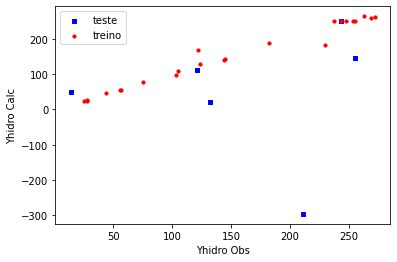

In [252]:
# expressa os dois dados em figura
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(Yhidro_obs_test,Yhidro_calc_test, s=10, c='b', marker="s", label='teste')
ax1.scatter(Yhidro_obs_train,Yhidro_calc_train, s=10, c='r', marker="o", label='treino')
plt.legend(loc='upper left')
plt.ylabel('Yhidro Calc')
plt.xlabel('Yhidro Obs')
plt.show()

In [253]:
mse=mean_squared_error(Yhidro_obs_test,Yhidro_calc_test)
print("MSE teste=",mse)
R2=r2_score(Yhidro_obs_test,Yhidro_calc_test)
print("R^2 teste=",R2)

MSE teste= 47034.003412116836
R^2 teste= -5.704245022316305


In [254]:
mse=mean_squared_error(Yhidro_obs_train,Yhidro_calc_train)
print("MSE treino=",mse)
R2=r2_score(Yhidro_obs_train,Yhidro_calc_train)
print("R^2 treino=",R2)

MSE treino= 210.67097275567448
R^2 treino= 0.9733550396793011
